In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from opensoundscape import BoxedAnnotations, CNN

In [4]:
import opensoundscape

In [6]:
metadata = pd.read_csv('./data/metadata.csv')
metadata.head()

,Unnamed: 0,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Species,Conf,Call_type,Filename,SiteHab,RecordingSched,RecorderName,DP,SoundFile,SoundFile_path,Split,Raven_path
0,0,0.763354,3.078034,2854.369,5965.410,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
1,1,6.588949,9.475884,2571.297,5451.150,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
2,2,10.434780,12.523959,3085.557,5348.299,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
3,3,14.854197,15.436757,3085.557,5862.558,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
4,4,55.578030,59.479764,2621.359,5475.728,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...


In [7]:
train_labels = pd.read_csv('data/train_labels.csv',index_col=['file', 'start_time', 'end_time'])
val_labels = pd.read_csv('data/val_labels.csv',index_col=['file', 'start_time', 'end_time'])
test_labels = pd.read_csv('data/test_labels.csv',index_col=['file', 'start_time', 'end_time'])
train_labels.head()


Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                             False   
                                                   2.0        4.0                             False   
                                                   4.0        6.0                             False   
                                                   6.0        8.0                             False   
                                                   8.0        10.0                            False   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                  False   
                                                   2.0        4.0                  False   
                                                   4.0        6.0                  False   
                                                   6.0        8.0                  False   
                                                   8.0        10.0                 False   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                     False   
                                                   2.0        4.0                     False   
                                                   4.0        6.0                     False   
                                                   6.0        8.0                     False   
                                                   8.0        10.0                    False   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0               False   
                                                   2.0        4.0               False   
                                                   4.0        6.0               False   
                                                   6.0        8.0               False   
                                                   8.0        10.0              False   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

             

In [8]:
# pick classes to train the model on. These should occur in the annotated data
class_list = ['Hypsipetes_madagascariensis','Copsychus_albospecularis','Coracopsis_nigra','Dicrurus_forficatus','Coua_caerulea','Zosterops_maderaspatanus','Eurystomus_glaucurus','Agapornis_canus','Saxicola_torquatus','Cyanolanius_madagascarinus','Leptopterus_chabert','Nesoenas_picturatus','Coua_reynaudii','Ceblepyris_cinereus','Neodrepanis_coruscans','Philepitta_castanea','Eulemur_sp','Coua_cristata','Treron_australis']

class_list==train_labels.columns.values


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [9]:
train_labels['Hypsipetes_madagascariensis'].sum()


5221

In [10]:
train_labels_resampled = opensoundscape.data_selection.resample(train_labels,n_samples_per_class = 5221, downsample = False,upsample = True)

In [11]:
#Check length vs original
len(train_labels_resampled.index)


99199

In [ ]:
#Check sum of each column - number of annotations per class dataframe.sum(axis = 0)
#learning rate schedule - multiply learning rate by x after y epochs. Might saturate after 1 epoch. 
#

In [ ]:
import wandb
'''wandb.login()'''#when logging in on a new machine
wandb_session = wandb.init(
    project='Rewilding_Madagascar',
)

In [12]:
#create new model and change parameters then visualize
# create a CNN and train on the labeled data
model = CNN(architecture='resnet18', sample_duration=2, classes=class_list)


In [ ]:
model.optimizer_params
#stochastic gradient descent (default for most ML stuff)
#initializes optimizer


{'class': torch.optim.sgd.SGD,
 'kwargs': {'lr': 0.01, 'momentum': 0.9, 'weight_decay': 0.0005},
 'classifier_lr': None}

In [ ]:
model.lr_scheduler_params
#changes learning rate over time
#default is wait a certain number of epochs and then multiply by x (step learning)
#if one epoch really huge, change step size to 1 and gamma to 0.2 
#way to empirically know is to check the saturation. once saturated for awhile and not getting much better it is a good time to bump down the learning rate
#will decrease a bit and then saturate again. 
#If learning rate is too slow it never saturates - moving too slowly on optimization. 
model.lr_scheduler_params['kwargs']['step_size'] = 1
model.lr_scheduler_params['kwargs']['gamma'] = 0.2
#Equivalent of what I did before is more similar to this (1 hyperparameter change impacts everything else)

In [ ]:
train_labels_resampled.shape

(99199, 19)

In [13]:
model.preprocessor.width

224

In [14]:
model.preprocessor.pipeline.bandpass.set(min_f=0,max_f=9000)
model.preprocessor.pipeline.to_spec.params.window_samples = 2048
model.preprocessor.width = None


In [16]:
samples = val_labels[val_labels['Coua_caerulea']]

In [17]:
samples.to_csv('samples.csv')

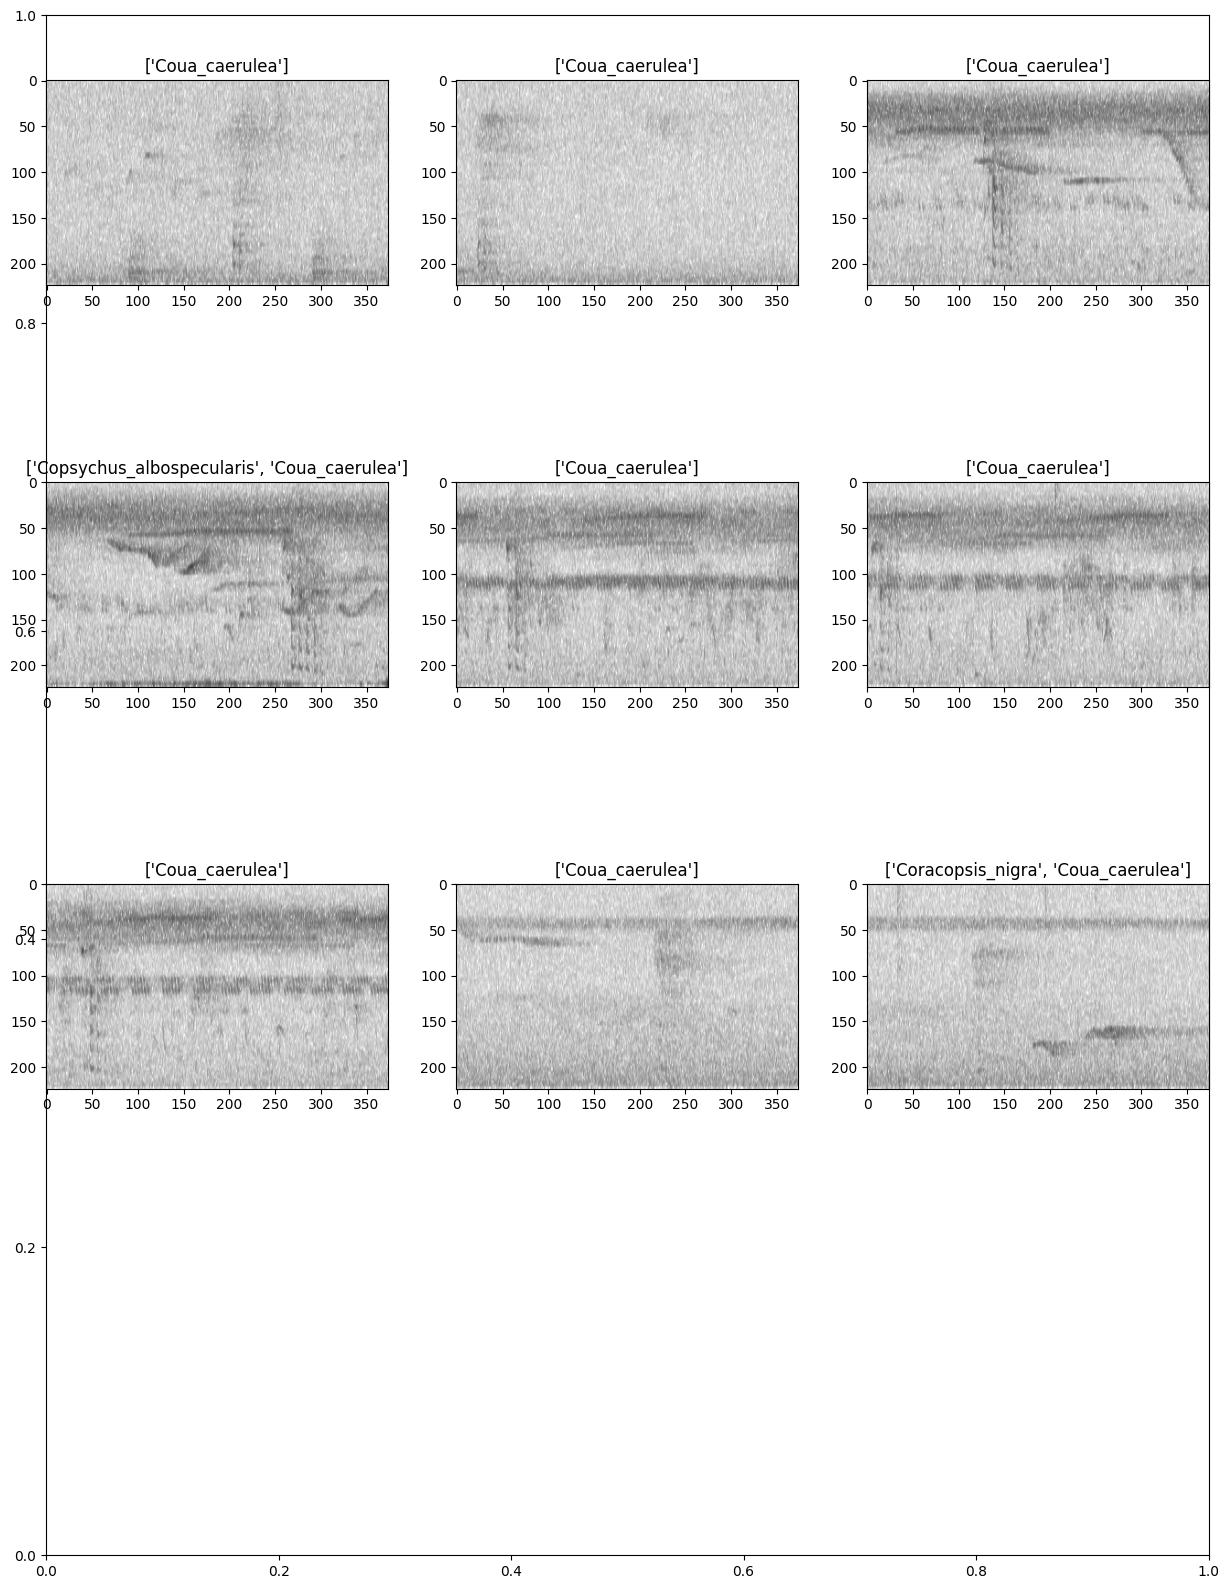

In [18]:
from opensoundscape.preprocess.utils import show_tensor_grid
from opensoundscape import AudioFileDataset
'''pre = SpectrogramPreprocessor(sample_duration=2.0)'''
dataset = AudioFileDataset(samples,model.preprocessor)
dataset.bypass_augmentations = True


tensors = [dataset[i].data for i in range(9)]
sample_labels = [list(dataset[i].labels[dataset[i].labels>0].index) for i in range(9)]

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [ ]:
#print rows 7 and 8 of df to get which audio file it is and go look at it and listen. 

In [ ]:
model.train(train_labels_resampled, val_labels, epochs=10, log_interval=20, num_workers=8, batch_size=256, wandb_session = wandb_session, save_path= '/mnt/class_data/group1_bioacoustics/sheila/model_checkpoints/model_4_resample')
wandb_session.finish()